## Lila and Gabby: Regression {-}


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [4]:
#Lila's filepath for the movie dataset
movies = pd.read_csv('Desktop/STAT3032/movie_metadata.csv')

#Gabby's filepath for the movie dataset:

In [5]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [13]:
movies['language'].value_counts()
#The majority of the movies are in English...but we could do a comparison of success based on english vs not english.

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Arabic           5
Danish           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Thai             3
Chinese          3
Icelandic        2
None             2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Panjabi          1
Urdu             1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: language, dtype: int64

In [26]:
movies['plot_keywords'].value_counts()
#pick certain words that come up often... 'love', 'illegal','money', 'superhero'
#can we isolate each word, and then find the value counts from there?

string = "one,two,three"
words = string.split(',')
words

['one', 'two', 'three']

In [100]:
keywords_list = movies['plot_keywords'].to_list()
len(keywords_list)

list_of_lists = []
for i in range(5043):
    if type(keywords_list[i])== str:
        z = keywords_list[i].split('|')
        list_of_lists.append(z)
#this returns a lists of lists, containing all of the keywords separately

list_of_keywords = []
for i in list_of_lists:
    for j in i:
        list_of_keywords.append(j)
#this new list is a list of every single keyword in the dataframe. Now let's see which ones are the most common

df_of_keywords = pd.DataFrame(list_of_keywords)
df_of_keywords.value_counts()

#these are the most popular keywords. We will do something with them

love                       198
friend                     166
murder                     161
death                      132
police                     126
                          ... 
high society                 1
high school sweethearts      1
high school romance          1
high school prom             1
lightning bolt               1
Length: 8086, dtype: int64

In [9]:
movies['genres']
#we should simplify this variable... as there are many different combos

0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
4                           Documentary
                     ...               
5038                       Comedy|Drama
5039       Crime|Drama|Mystery|Thriller
5040              Drama|Horror|Thriller
5041               Comedy|Drama|Romance
5042                        Documentary
Name: genres, Length: 5043, dtype: object

We want to initially explore what predictors should be used, regarding a regression model where gross is the response.

In [11]:
movies.shape
#5,043 movies, 28 variables

movies.head()

movies.corrwith(movies.gross)

num_critic_for_reviews       0.480601
duration                     0.250298
director_facebook_likes      0.144945
actor_3_facebook_likes       0.308026
actor_1_facebook_likes       0.154468
gross                        1.000000
num_voted_users              0.637271
cast_total_facebook_likes    0.247400
facenumber_in_poster        -0.027755
num_user_for_reviews         0.559958
budget                       0.102179
title_year                   0.030886
actor_2_facebook_likes       0.262768
imdb_score                   0.198021
aspect_ratio                 0.069346
movie_facebook_likes         0.378082
dtype: float64

It seems like num_voted_users, num_user_for_reviews, and num_critic_for_reviews are the three variables with the highest correlation with gross. These variables are defined as:<br>
**num_voted_users:** The total number of users who interacted with the movie? <br>
**num_user_for_reviews:** The number of user reviews for a certain movie. <br>
**num_critic_for_reviews:** The number of critic reviews for a certain movie. <br>

These three variabes can not be used for prediction, as they are all measures recorded after a movie is already made. 

In [6]:
model = smf.ols('gross~movie_facebook_likes+cast_total_facebook_likes', data=movies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     433.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          1.50e-171
Time:                        14:20:26   Log-Likelihood:                -80542.
No. Observations:                4159   AIC:                         1.611e+05
Df Residuals:                    4156   BIC:                         1.611e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3.159e+07   1.16e+06     27.283      0.000    2.93e+07    3.39e+07
movie_facebook_likes       1123.3754     47.527     23.636      0.000    1030.196    1216.555
cast_total_facebook_likes   649.4919     53.356     12.173      0.000     544.885     754.099
==============================================================================
Omnibus:                     2479.216   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34219.840
Skew:                           2.597   Prob(JB):                         0.00
Kurtosis:                      16.057   Cond. No.                     3.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='movie_facebook_likes', ylabel='gross'>

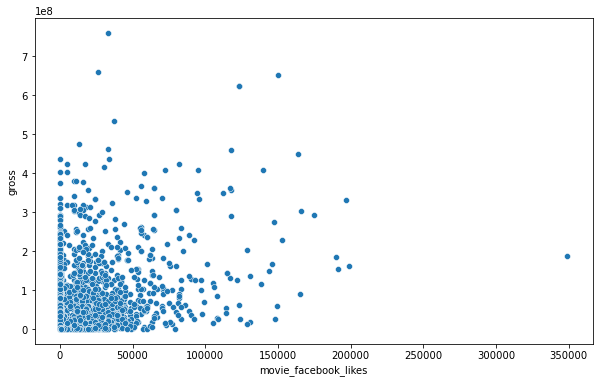

In [7]:
plt.rcParams["figure.figsize"] = (10,6)
sns.scatterplot(x ='movie_facebook_likes',y = 'gross',data = movies)

<AxesSubplot:xlabel='cast_total_facebook_likes', ylabel='gross'>

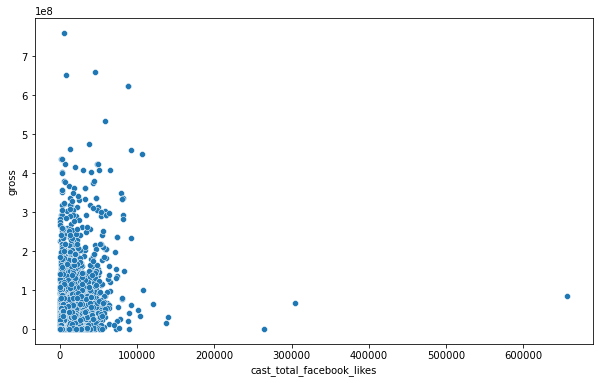

In [8]:
plt.rcParams["figure.figsize"] = (10,6)
sns.scatterplot(x ='cast_total_facebook_likes',y = 'gross',data = movies)